# Development examples

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import heputils

# TODO: heputils.set_style("ATLAS")

# Fix this
import mplhep

plt.style.use(mplhep.style.ATLAS)

In [2]:
with open("example.json") as infile:
    hists = json.load(infile)

In [3]:
_keys = list(hists.keys())
labels = [r"$t\bar{t}$", r"$W+$jets", "Other", "Signal"]
mass_hists = [
    (np.array(hists[key]["counts"]), np.array(hists[key]["bins"])) for key in _keys
]

In [4]:
colormap = ["darkorange", "steelblue", "firebrick", "purple"]

scale_factors = np.ones(len(mass_hists))
scale_factors[-1] = 10

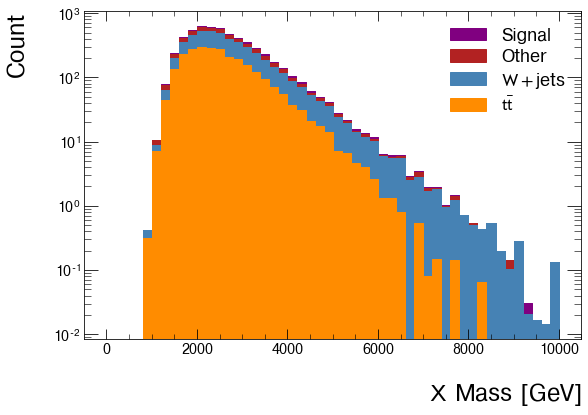

In [5]:
heputils.plot.stack_hist(
    mass_hists, labels=labels, color=colormap, xlabel=r"$X$ Mass [GeV]", ylabel="Count"
);

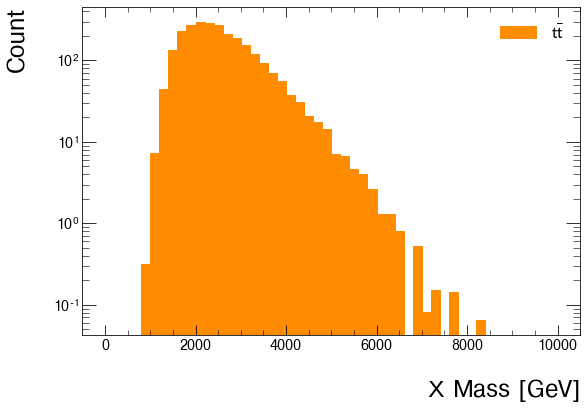

In [6]:
ax, artists = heputils.plot.stack_hist(
    mass_hists[0],
    labels=labels,
    color=colormap,
    xlabel=r"$X$ Mass [GeV]",
    ylabel="Count",
    return_artists=True,
)

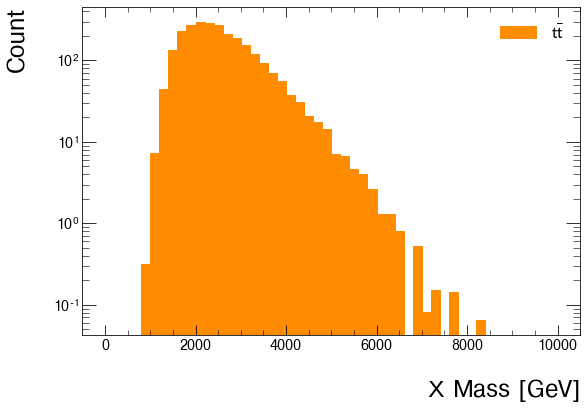

In [7]:
ax.figure

In [8]:
mass_hists = [heputils.convert.numpy_to_hist(*hist, label) for hist, label in zip(mass_hists, _keys)]

[StepArtists(step=<matplotlib.lines.Line2D object at 0x7f49e8dd7490>, errorbar=None, legend_artist=None)]

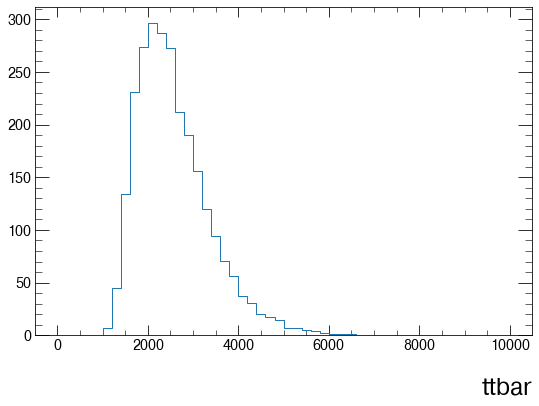

In [9]:
mass_hists[0].plot()